# Case 1: single fracture

Import the definitions of the plot routines:

In [1]:
import plotroutines as pr
import matplotlib.pyplot as plt
plt.rc('text', usetex=False) # don't use Latex as Binder currently fails, see https://github.com/jupyterhub/binderhub/issues/1143

Choose a refinement index, `0` indicating the coarsest meshes (1k cells), `1` the intermediate ones (10k cells) and `2` the finest ones (100k cells):

In [2]:
ref_index = "0"

Choose the places and methods that should be evaluated. The names have to be consistent with the folder names in `../results`:

In [3]:
# once the Latex issue is fixed, replace "_" by "\_"
places_and_methods = {
    "UiB": ["TPFA", "MPFA", "MVEM", "RT0"],
    "USTUTT": ["MPFA", "TPFA_Circ"],
    "LANL": ["MFD"],
    "NCU_TW": ["Hybrid_FEM"],
    "UNICE_UNIGE": ["VAG_Cont", "HFV_Cont", "VAG_Disc", "HFV_Disc"],
    "ETHZ_USI": ["FEM_LM"],
    "UNICAMP": ["Hybrid_Hdiv"],
    "UNIL_USI": ["FE_AMR_AFC"],
    "INM": ["EDFM"],
    "DTU": ["FEM_COMSOL"]
};

Perform the plot of the matrix hydraulic head over *line* corresponding to Figure 2 by looping through all places and methods, taking the data from the files `dol_refinement_{0,1,2}.csv` in the corresponding folders:

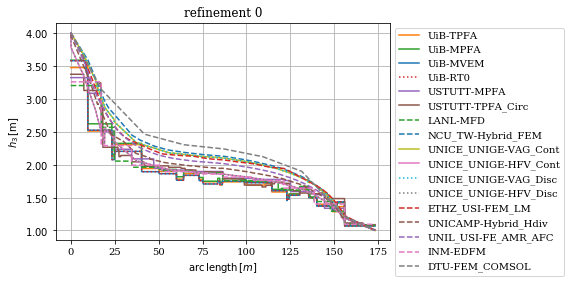

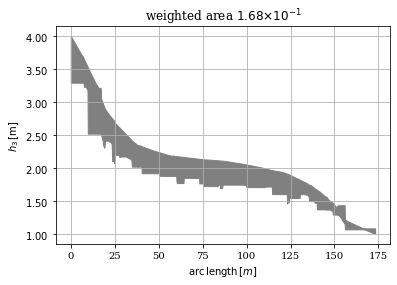

In [4]:
fig = plt.figure()
ax = fig.add_subplot()

for place in places_and_methods:
    for method in places_and_methods[place]:
        folder = "../results/" + place + "/" + method + "/"
        data = folder.replace("\\", "") + "dol_refinement_" + ref_index + ".csv"
        label = place + "-" + method

        pr.plot_over_line(data, label, ref_index, pr.id_p_matrix, "refinement " + ref_index, ax,
                          pr.linestyle[place][method], pr.color[place][method])

fig = plt.figure()
ax = fig.add_subplot()
dummy = pr.plot_percentiles(ref_index, pr.id_p_matrix, places_and_methods, ax)

Do the same for the matrix concentration corresponding to Figure 3:

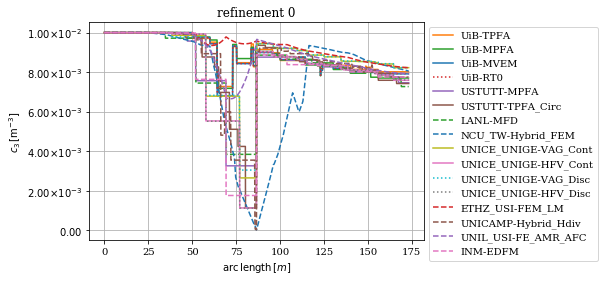

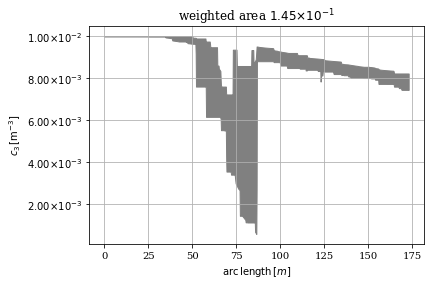

In [5]:
# remove DTU as they didn't provide concentration results
if places_and_methods.get("DTU"):
    places_and_methods.pop("DTU")

fig = plt.figure()
ax = fig.add_subplot()

for place in places_and_methods:
    for method in places_and_methods[place]:
        folder = "../results/" + place + "/" + method + "/"
        data = folder.replace("\\", "") + "dol_refinement_" + ref_index + ".csv"
        label = place + "-" + method

        pr.plot_over_line(data, label, ref_index, pr.id_c_matrix, "refinement " + ref_index, ax,
                          pr.linestyle[place][method], pr.color[place][method])

fig = plt.figure()
ax = fig.add_subplot()
dummy = pr.plot_percentiles(ref_index, pr.id_c_matrix, places_and_methods, ax)

And again for the fracture concentration corresponding to Figure 4:

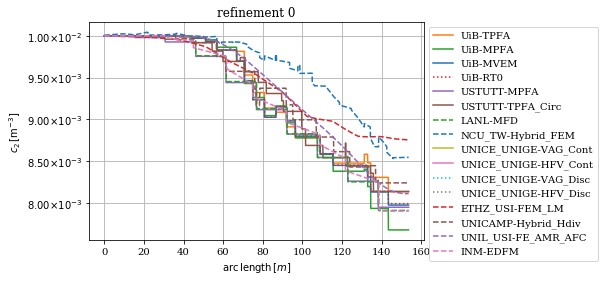

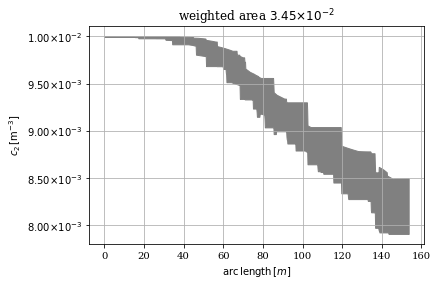

In [6]:
fig = plt.figure()
ax = fig.add_subplot()

for place in places_and_methods:
    for method in places_and_methods[place]:
        folder = "../results/" + place + "/" + method + "/"
        data = folder.replace("\\", "") + "dol_refinement_" + ref_index + ".csv"
        label = place + "-" + method

        pr.plot_over_line(data, label, ref_index, pr.id_c_fracture, "refinement " + ref_index, ax,
                          pr.linestyle[place][method], pr.color[place][method])

fig = plt.figure()
ax = fig.add_subplot()
dummy = pr.plot_percentiles(ref_index, pr.id_c_fracture, places_and_methods, ax)

Proceed with the plots over *time*. Again by looping through all places and methods, this time taking the data from the files `dot_refinement_{0,1,2}.csv` and calling `plot_over_time` instead of `plot_over_line`. Start with the integrated matrix concentration, corresponding to Figure 5.

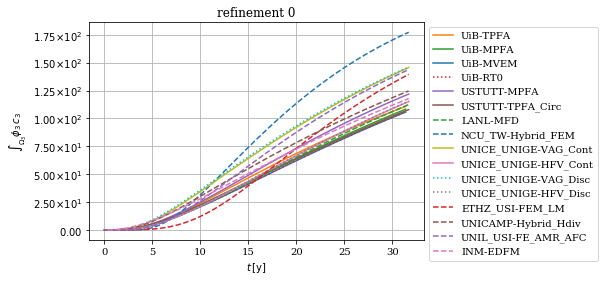

In [7]:
fig = plt.figure()
ax = fig.add_subplot()

for place in places_and_methods:
    for method in places_and_methods[place]:
        folder = "../results/" + place + "/" + method + "/"
        data = folder.replace("\\", "") + "dot_refinement_" + ref_index + ".csv"
        label = place + "-" + method

        pr.plot_over_time(data, label, ref_index, pr.id_intc_matrix, "refinement " + ref_index, ax,
                          pr.linestyle[place][method], pr.color[place][method])

Continue with the integrated fracture concentration (Figure 6).

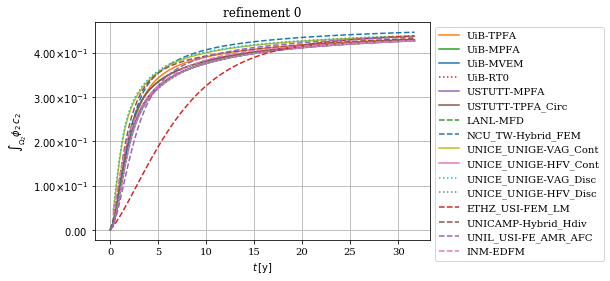

In [8]:
fig = plt.figure()
ax = fig.add_subplot()

for place in places_and_methods:
    for method in places_and_methods[place]:
        folder = "../results/" + place + "/" + method + "/"
        data = folder.replace("\\", "") + "dot_refinement_" + ref_index + ".csv"
        label = place + "-" + method

        pr.plot_over_time(data, label, ref_index, pr.id_intc_fracture, "refinement " + ref_index, ax,
                          pr.linestyle[place][method], pr.color[place][method])

Finally the integrated concentration flux across the outlet boundary (Figure 7).

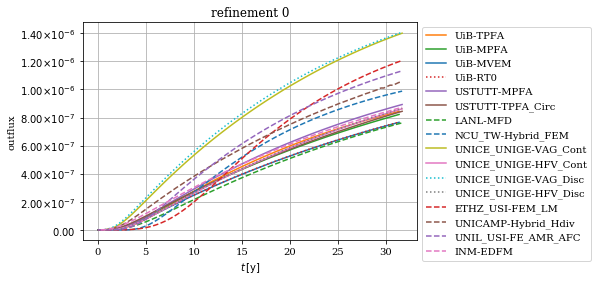

In [9]:
fig = plt.figure()
ax = fig.add_subplot()

for place in places_and_methods:
    for method in places_and_methods[place]:
        folder = "../results/" + place + "/" + method + "/"
        data = folder.replace("\\", "") + "dot_refinement_" + ref_index + ".csv"
        label = place + "-" + method

        pr.plot_over_time(data, label, ref_index, pr.id_outflux, "refinement " + ref_index, ax,
                          pr.linestyle[place][method], pr.color[place][method])